In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

# Linear Regression

In [2]:
dataset = pd.read_csv("data/house_prices.csv")
print(dataset.shape)

(21613, 21)


In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
size = dataset['sqft_living']
price = dataset['price']
print(size.shape)

X = np.array(size).reshape(-1,1)
y = np.array(price).reshape(-1,1)

(21613,)


In [5]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# MSE and R square value
regression_model_mse = mean_squared_error(X, y)
print("MSE: ", math.sqrt(regression_model_mse))
print("R squared value:", model.score(X,y))

MSE:  650965.7788663033
R squared value: 0.49285321790379316


In [7]:
# this is the b0
print(model.coef_[0])
# this is b1 in our model
print(model.intercept_)

[280.6235679]
[-43580.74309447]


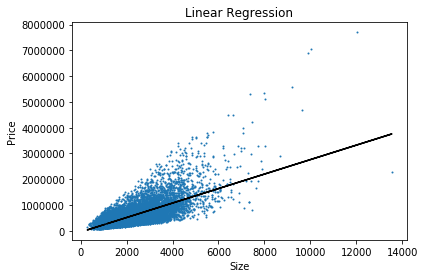

In [8]:
plt.scatter(X, y, s=1)
plt.plot(X, model.predict(X), color = 'black')
plt.title ("Linear Regression")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

In [9]:
# Predicting the prices
print("Prediction by the model:" , model.predict([[2000]]))

Prediction by the model: [[517666.39270042]]


# Logistic Regression

In [10]:
creditData = pd.read_csv("data/credit_data.csv")
creditData.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [11]:
X = creditData[["income","age","loan","LTI"]]
y = creditData.default

## Hold out test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
model_LR = LogisticRegression()
model_LR.fit = model_LR.fit(X_train, y_train)

In [14]:
predictions = model_LR.fit.predict(X_test)

print(confusion_matrix(y_test, predictions), '\n')
print(accuracy_score(y_test, predictions))

[[503   9]
 [ 43  45]] 

0.9133333333333333


## Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [16]:
model_LR_cv = LogisticRegression()

predicted = cross_val_predict(model_LR_cv, X, y, cv=10)
print(accuracy_score(y, predicted))

0.913


In [17]:
scores = cross_val_score(model_LR_cv, X, y, cv=10)
print(scores)
print(np.mean(scores))

[0.90049751 0.91542289 0.91542289 0.93       0.89       0.9
 0.915      0.91457286 0.92462312 0.92462312]
0.9130162379059475
